In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [27]:
import tensorflow as tf

In [28]:
def process_image(image_path, IMG_SIZE=224):

    image = tf.io.read_file(image_path)
    image = tf.io.decode_image(image, channels=3, expand_animations= False)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
    return image

In [29]:
images_loc = []
labels = []
for i in os.listdir("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/cardboard"):
    images_loc.append(process_image("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/cardboard"+"/"+i))
    labels.append(0)
for i in os.listdir("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/glass"):
    images_loc.append(process_image("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/glass"+"/"+i))
    labels.append(1)
for i in os.listdir("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal"):
    images_loc.append(process_image("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal"+"/"+i))
    labels.append(2)
for i in os.listdir("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/paper"):
    images_loc.append(process_image("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/paper"+"/"+i))
    labels.append(3)
for i in os.listdir("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/plastic"):
    images_loc.append(process_image("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/plastic"+"/"+i))
    labels.append(4)
for i in os.listdir("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/trash"):
    images_loc.append(process_image("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/trash"+"/"+i))
    labels.append(5)

In [30]:
classnames = np.array(["cardboard", "glass", "metal", "paper", "plastic", "trash"])

In [31]:
images_loc = np.array(images_loc)
labels = np.array(labels)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_testy, y_train, y_testy = train_test_split(images_loc, labels, test_size = 0.3)

In [33]:
X_val, X_test, y_val, y_test = train_test_split(X_testy, y_testy, test_size = 0.5)

In [34]:
len(X_test), len(y_test)

(380, 380)

In [35]:
import matplotlib.pyplot as plt
def show_25_images(images, labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(images[i])
        plt.title(classnames[labels[i]])
        plt.axis("off")

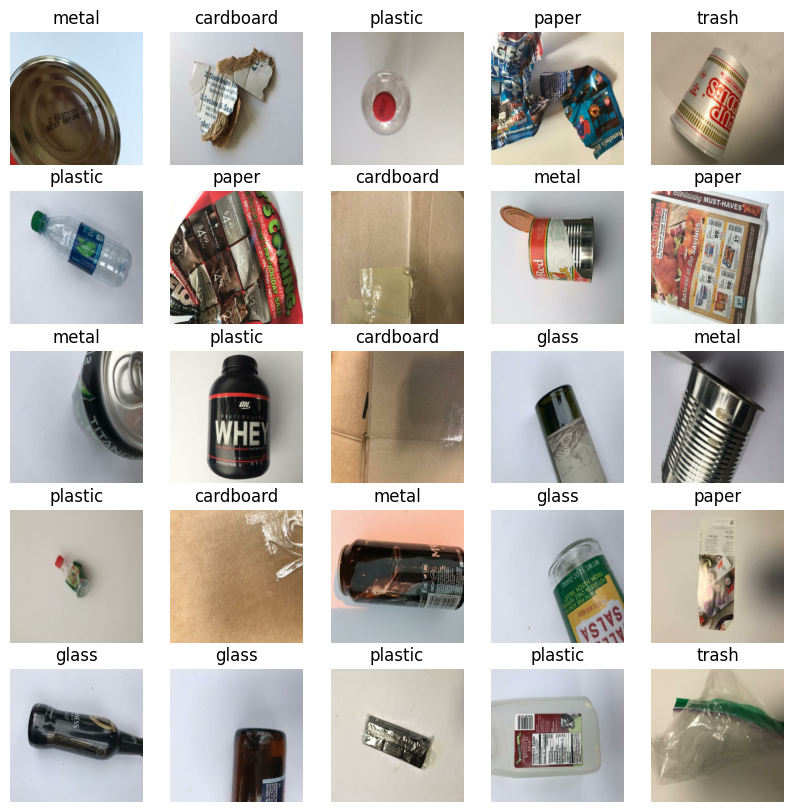

In [ ]:
show_25_images(X_train, y_train)

## Using MobileNetV2

In [37]:
import tensorflow_hub as hub
model = tf.keras.Sequential([
   hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/100-224-classification/versions/2",
               trainable=True, arguments=dict(batch_norm_momentum=0.997))
])
model.add(tf.keras.layers.Dense(6, activation='softmax'))

model.build([None, 224, 224, 3]) 

In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 6)                 6012      
                                                                 
Total params: 3546277 (13.53 MB)
Trainable params: 3512165 (13.40 MB)
Non-trainable params: 34112 (133.25 KB)
_________________________________________________________________


In [1]:
model.fit(x = X_train, 
          y = y_train,
          epochs=100,
          validation_data = (X_val, y_val))

NameError: name 'model' is not defined

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
model.save("mobile_net_v2_model.h5")

### The accuracy isnt high, trying other models

## Using Inception-ResNet-v2

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/inception-resnet-v2/frameworks/TensorFlow2/variations/classification/versions/2")
])
m.add(tf.keras.layers.Dense(6, activation='softmax'))


In [ ]:
m.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

m.build((None, 224,224,3))

In [ ]:
m.summary()

In [ ]:
history = m.fit(x = X_train, 
          y = y_train,
          epochs=100,
          validation_data = (X_val, y_val),
          batch_size = 32)

In [ ]:
loss, acc = m.evaluate(X_test, y_test)
print("The accuracy of the model is {:.3f}\nThe Loss in the model is {:.3f}".format(acc,loss))

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(hisData,train,test): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

# show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')

In [ ]:
model.save("resnet.h5")

## Custom CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

input_shape = (224, 224, 3)  
num_classes = 6

model_cnn = Sequential()

model_cnn = Sequential()
   
model_cnn.add(Conv2D(32,(3,3), padding='same', input_shape=input_shape,activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2,2))) 
model_cnn.add(BatchNormalization())
model_cnn.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2,2))) 
model_cnn.add(BatchNormalization())
model_cnn.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2,2))) 
model_cnn.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(64,activation='relu'))
model_cnn.add(Dense(num_classes,activation='softmax'))

model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_cnn.summary()


In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)


In [ ]:
model_cnn.fit(x = X_train, 
          y = y_train,
          epochs=100,
          validation_data = (X_val, y_val),
          batch_size = 32, 
          callbacks=[checkpoint_callback])

In [ ]:
model_cnn.evaluate(X_test, y_test)

## To predict

Since resnet gave the best results, lets use that for predictions

In [ ]:
from PIL import Image
img_path = input("Enter the image path for prediction : ")
image = process_image(img_path) 
image = np.expand_dims(image, axis=0) 
p = np.argmax(resnet.predict(image))
a = plt.imread(img_path)
plt.title(f"Prediction : {classnames[p]}")
plt.imshow(a)



In [45]:
from PIL import Image
img_path = input("Enter the image path for prediction : ")
image = process_image(img_path) 
image = np.expand_dims(image, axis=0) 
p = np.argmax(resnet.predict(image))
a = plt.imread(img_path)
plt.title(f"Prediction : {classnames[p]}")
plt.imshow(a)

Enter the image path for prediction :  /kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal/metal103.jpg


NameError: name 'resnet' is not defined